In [72]:
import os #used for changing the working directory
import numpy as np #for using numpy functions
import pandas as pd #data manipulation and analysis
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar
from statsmodels.stats import ( 
    weightstats as ssw,  # Weighted statistics (e.g., t-tests)
)
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scipy.stats as stats

In [2]:
os.chdir(r'E:/CDAC/Statistics and PML/Statistics') #changing the working directory

In [3]:
df = pd.read_csv('hotel_bookings.csv') #reading a CSV file and making a dataframe out of it
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# 1. Data Cleaning and Preprocessing

In [6]:
df.isnull().sum() # checking number of null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df1 = df.drop(['company', 'agent'], axis=1)

dropping 'company' and 'agent' column because they have lots of null values and irrelevant to our study

In [8]:
df1.children = df1.children.fillna(df1.children.median())

Filling the missing values in children column with mode value.

In [9]:
df2 = df1.dropna(subset=['country'])

In [10]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df2['arrival_date_month'] = pd.to_datetime(df2['arrival_date_month'], format='%B').dt.month

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\2413653413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['arrival_date_month'] = pd.to_datetime(df2['arrival_date_month'], format='%B').dt.month


month is in string. converting it to its corresponding month number.

In [12]:
df2['arrival_date'] = pd.to_datetime(dict(year=df2['arrival_date_year'], month=df2['arrival_date_month'], day=df2['arrival_date_day_of_month']))
df2['arrival_date'].head()

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\1387634668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['arrival_date'] = pd.to_datetime(dict(year=df2['arrival_date_year'], month=df2['arrival_date_month'], day=df2['arrival_date_day_of_month']))


0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

Making a new column out of day, month and year i.e., arrival_date

In [13]:
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\2103282634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])


converted reservation_status_date from object to datetime

In [14]:
df2['total_stay'] = df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\1436206412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_stay'] = df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']


created a new column 'total_stay' by adding stays_in_week_nights and 'stays_in_weekend_nights'

In [15]:
df2['total_guests'] = df2['adults'] + df2['children'] + df2['babies']

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\3438941138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_guests'] = df2['adults'] + df2['children'] + df2['babies']


calculating total guests by adding adults, children and babies

In [16]:
df2['total_revenue'] = df2['adr'] * df2['total_stay']

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\553329867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_revenue'] = df2['adr'] * df2['total_stay']


calculating total revenue of each booking

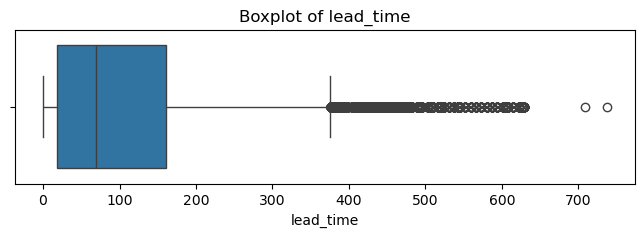

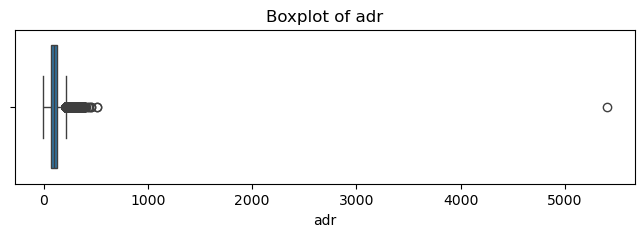

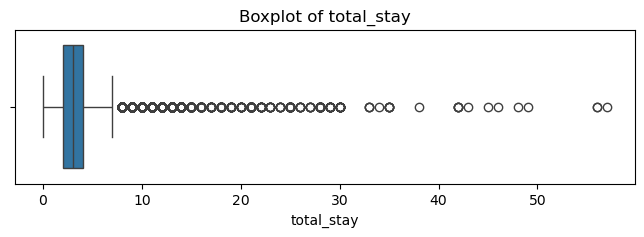

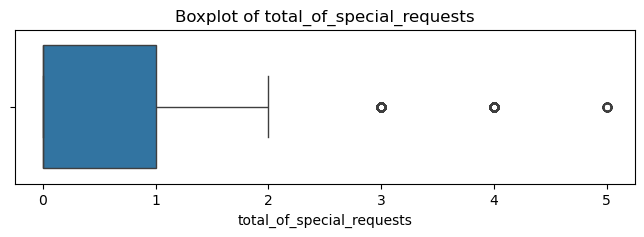

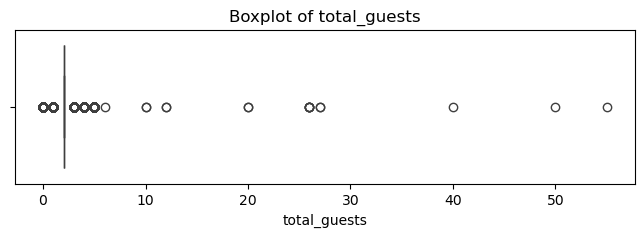

In [98]:
numeric_cols = ['lead_time', 'adr', 'total_stay', 'total_of_special_requests', 'total_guests']

for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


I am keeping outliers as it is. There are business questions which may depend upon these data. If I remove these or replace these with q3 < max <= ub, lb < min <= q1

In [99]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_stay', 'total_guests', 'total_revenue', 'arrival_month_year'],
      dtype='object')

# 2. Exploratory Data Analysis

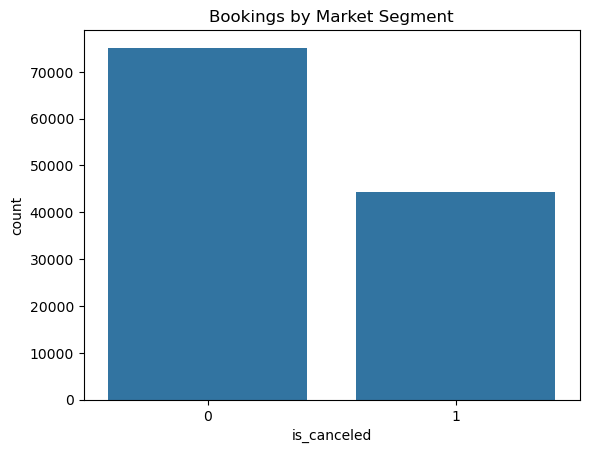

In [113]:
sns.countplot(x='is_canceled', data=df, order=df['is_canceled'].value_counts().index)
plt.title("Bookings by Market Segment")
plt.show()

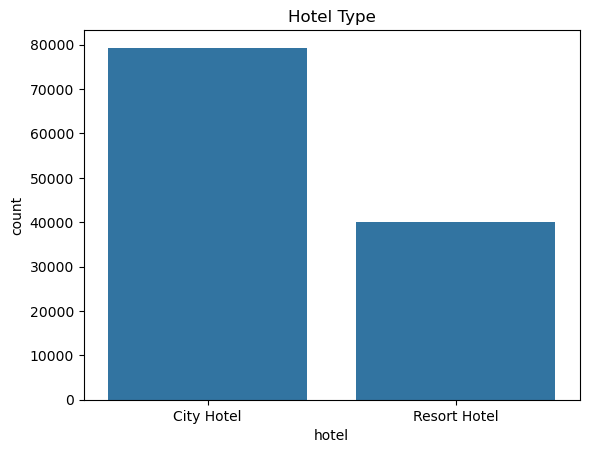

In [114]:
sns.countplot(x='hotel', data=df, order=df['hotel'].value_counts().index)
plt.title("Hotel Type")
plt.show()

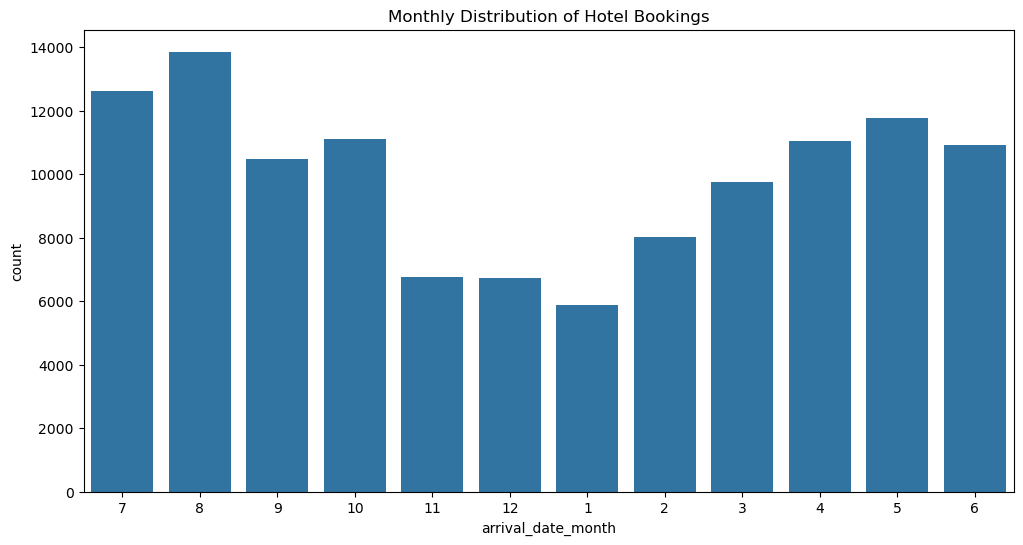

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df2, order=df2['arrival_date_month'])
plt.title("Monthly Distribution of Hotel Bookings")
plt.show()

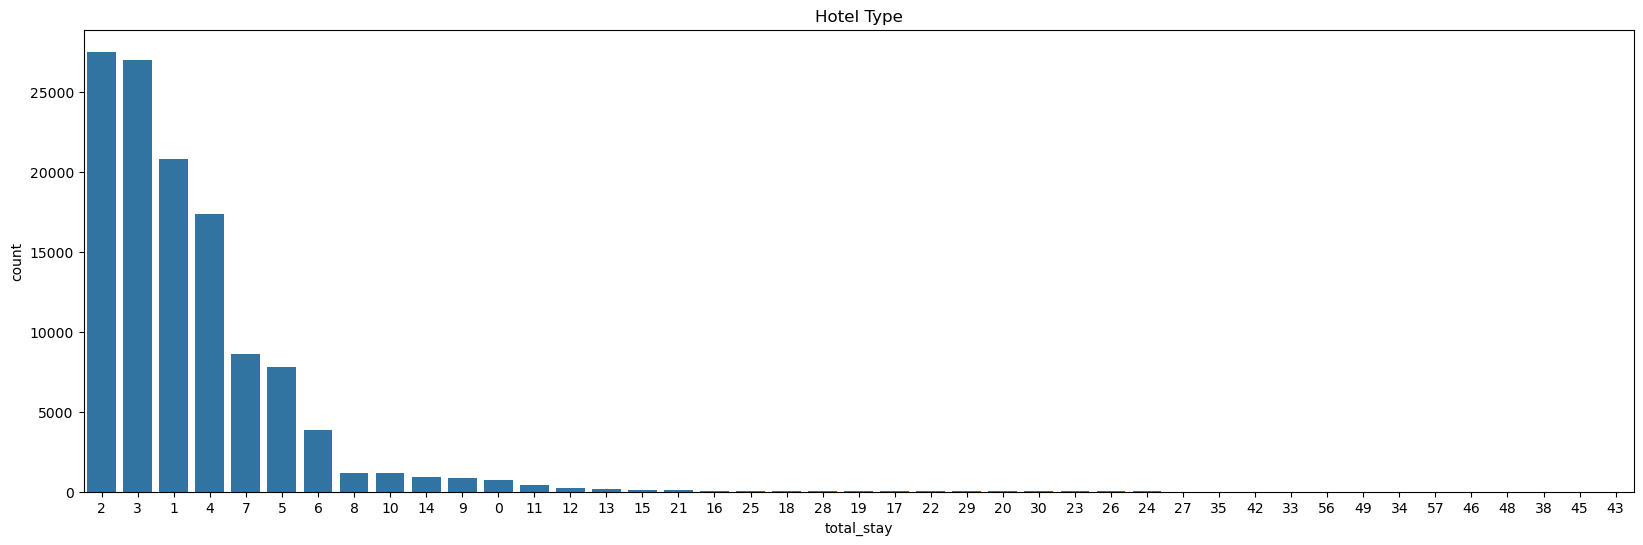

In [142]:
plt.figure(figsize=(20, 6))
sns.countplot(x='total_stay', data=df2, order=df2['total_stay'].value_counts().index)
plt.title("Hotel Type")
plt.show()

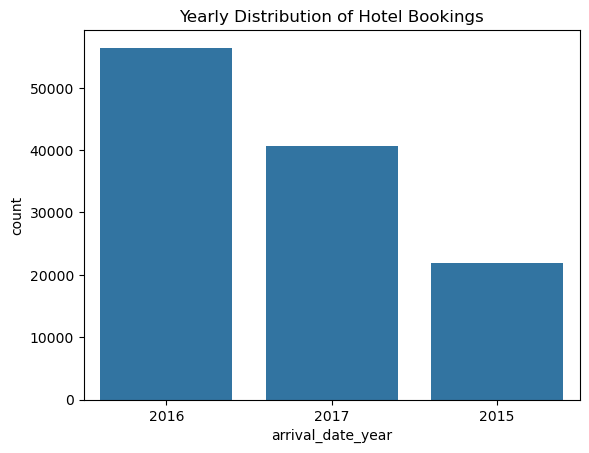

In [133]:
sns.countplot(x='arrival_date_year', data=df2, order=df['arrival_date_year'].value_counts().index)
plt.title("Yearly Distribution of Hotel Bookings")
plt.show()

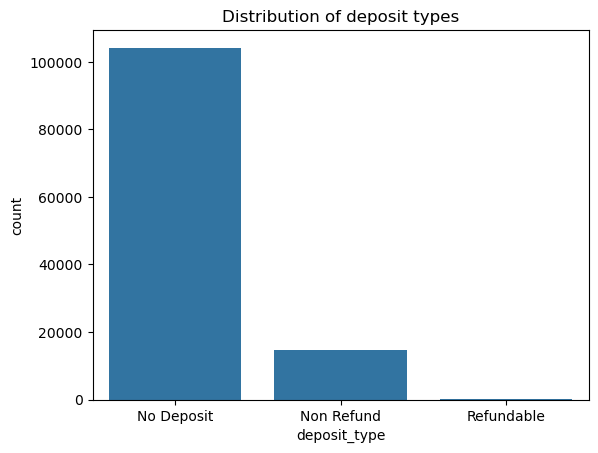

In [154]:
sns.countplot(x='deposit_type', data=df2, order=df2['deposit_type'].value_counts().index)
plt.title("Distribution of deposit types")
plt.show()

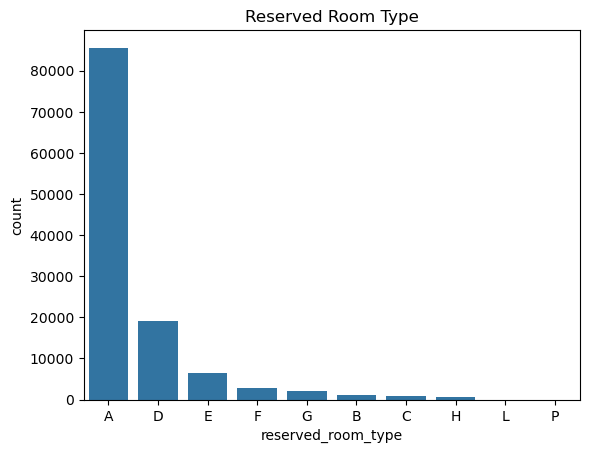

In [153]:
sns.countplot(x='reserved_room_type', data=df2, order=df2['reserved_room_type'].value_counts().index)
plt.title("Reserved Room Type")
plt.show()

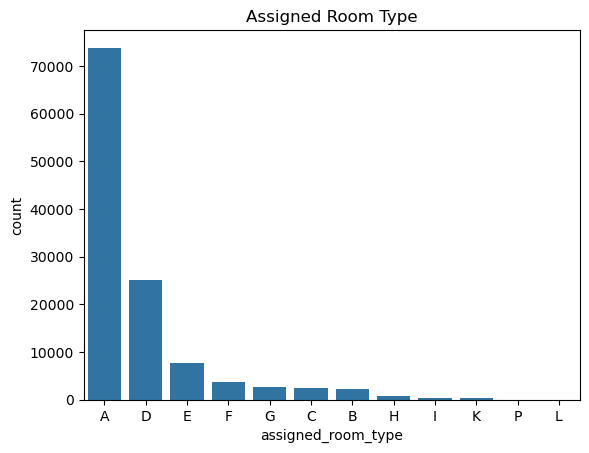

In [152]:
sns.countplot(x='assigned_room_type', data=df2, order=df2['assigned_room_type'].value_counts().index)
plt.title("Assigned Room Type")
plt.show()

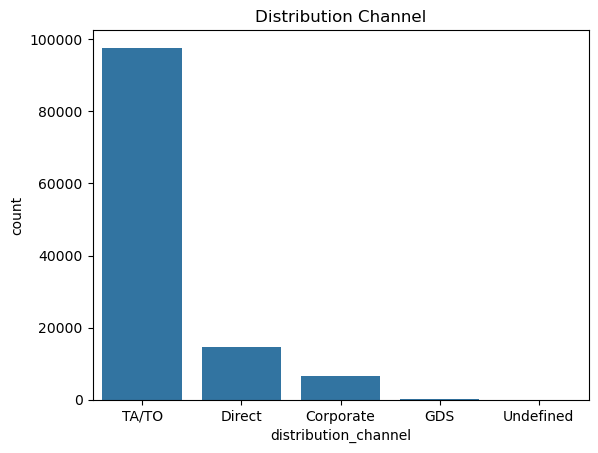

In [150]:
sns.countplot(x='distribution_channel', data=df2, order=df2['distribution_channel'].value_counts().index)
plt.title("Distribution Channel")
plt.show()

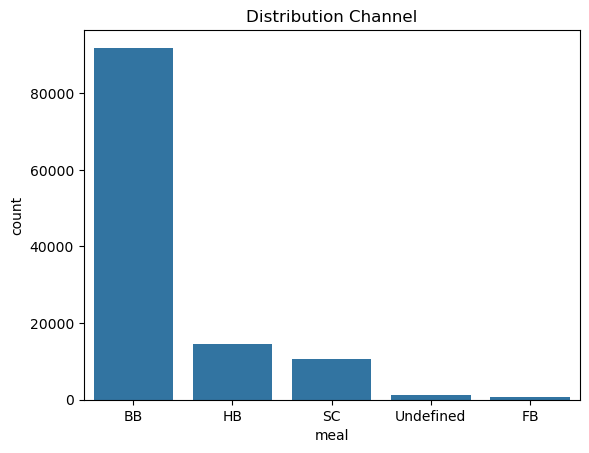

In [155]:
sns.countplot(x='meal', data=df2, order=df2['meal'].value_counts().index)
plt.title("Distribution Channel")
plt.show()

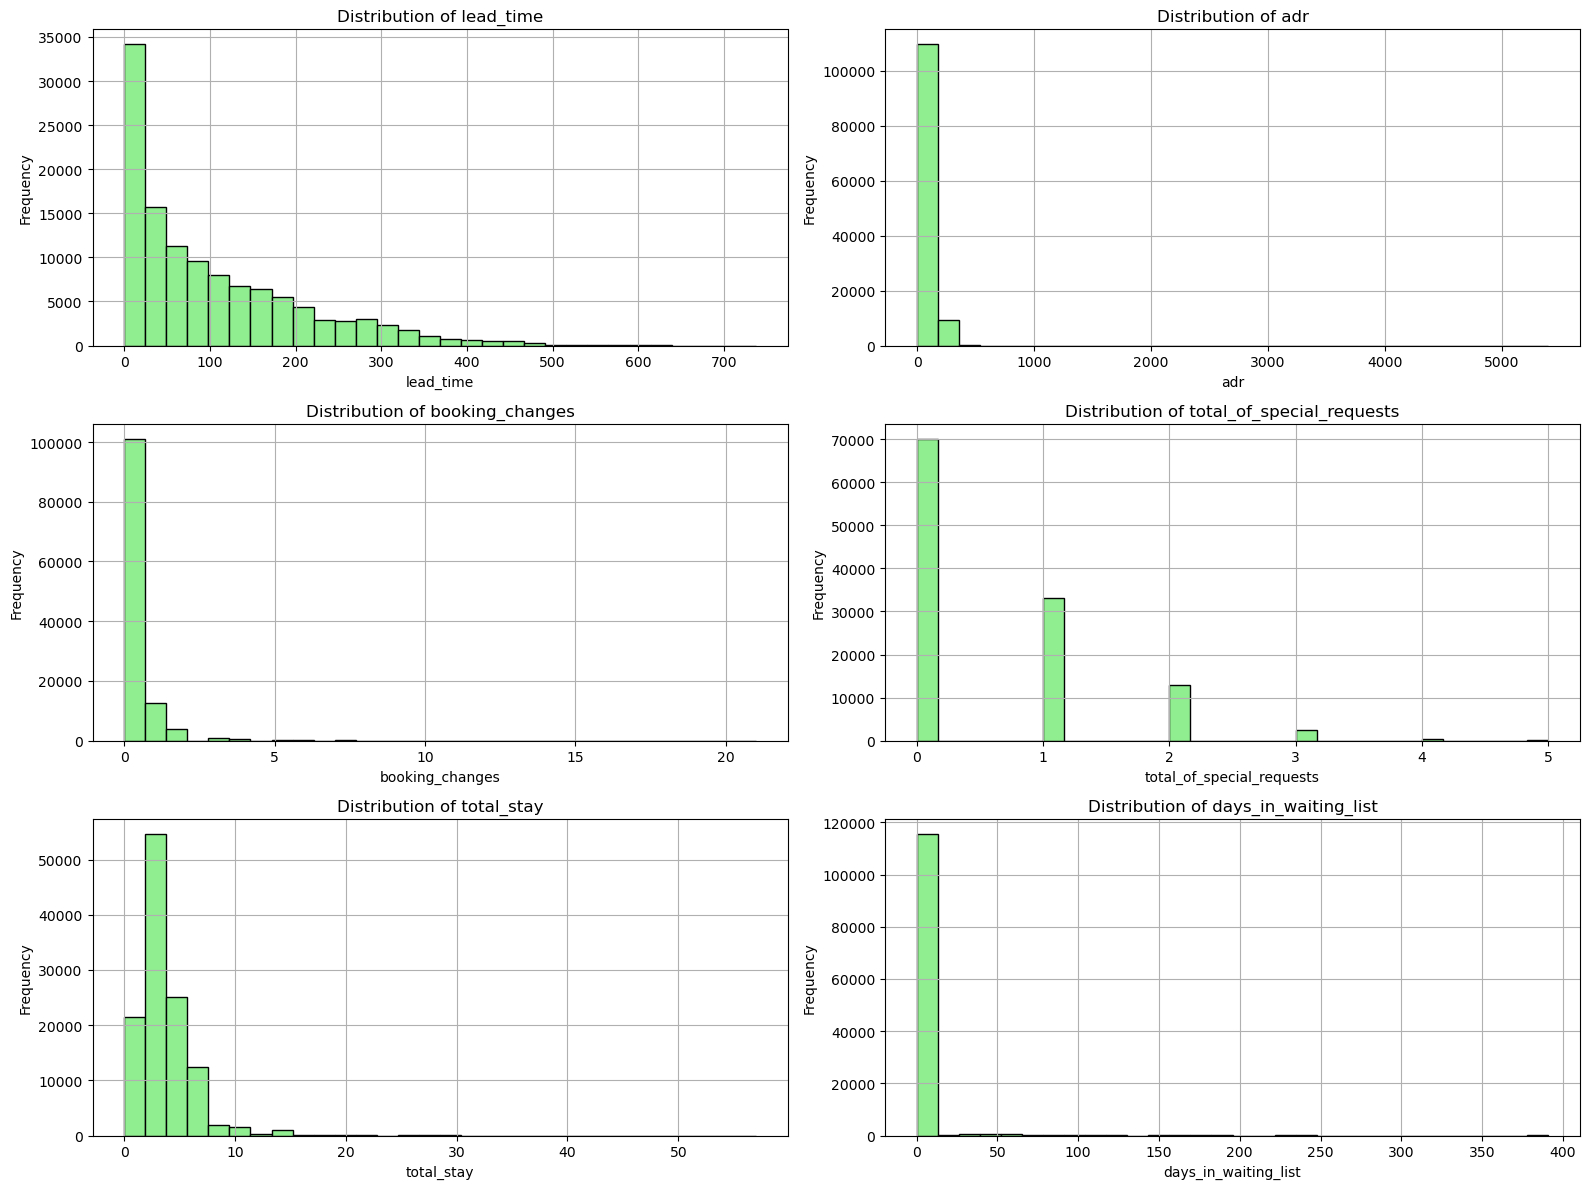

In [160]:
cols = ['lead_time', 'adr', 'booking_changes', 'total_of_special_requests',
        'total_stay', 'days_in_waiting_list']

# Set up the subplot grid
plt.figure(figsize=(16, 12))  # Adjust as needed

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)  # 3 rows x 2 columns grid
    plt.hist(df2[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


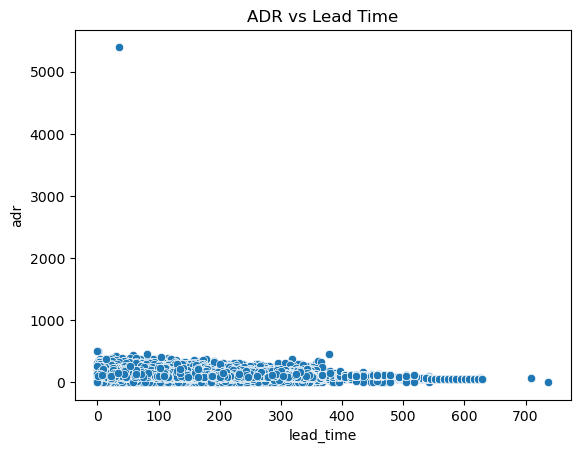

In [184]:
sns.scatterplot(x='lead_time', y='adr', data=df2)
plt.title('ADR vs Lead Time')
plt.show()

Text(0.5, 1.0, 'Lead Time vs ADR by Customer Type')

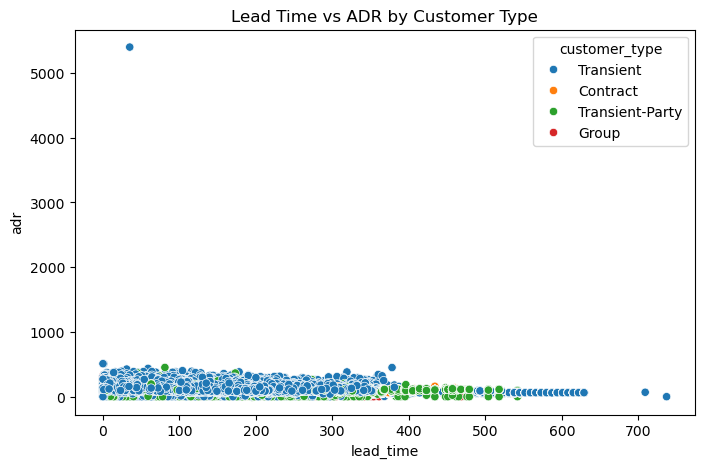

In [183]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2, x='lead_time', y='adr', hue='customer_type')
plt.title('Lead Time vs ADR by Customer Type')

<Axes: xlabel='market_segment', ylabel='adr'>

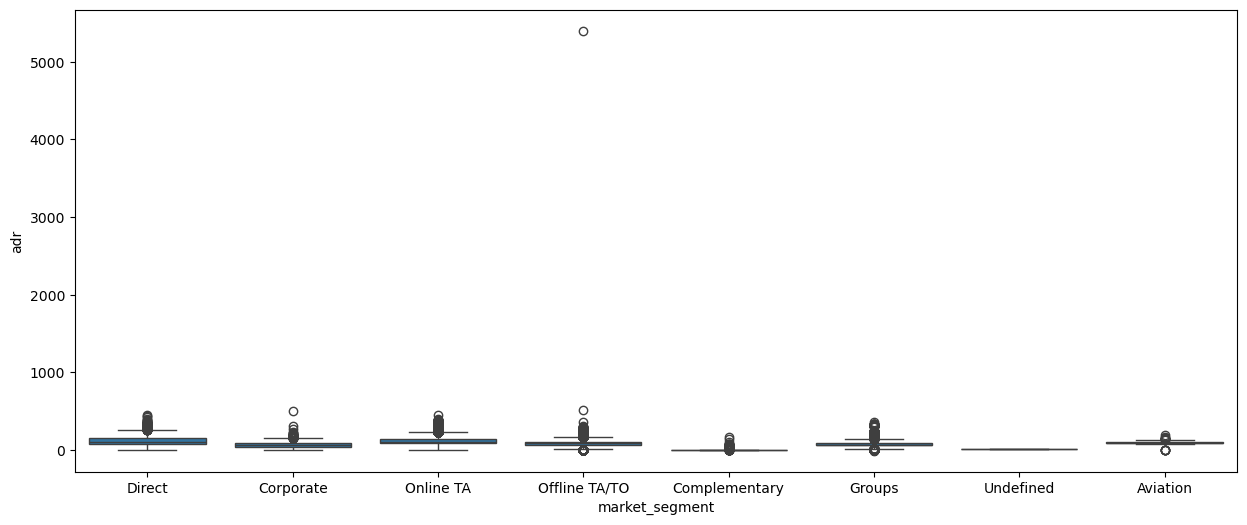

In [182]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df2, x='market_segment', y='adr')

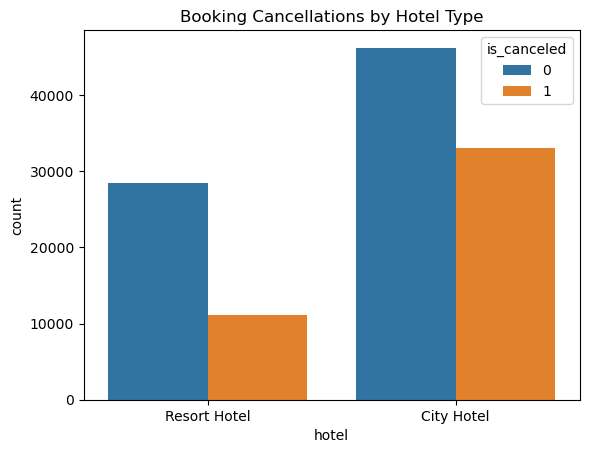

In [181]:
sns.countplot(x='hotel', hue='is_canceled', data=df2)
plt.title('Booking Cancellations by Hotel Type')
plt.show()

Text(0.5, 1.0, 'ADR vs Total Nights (colored by Cancellation)')

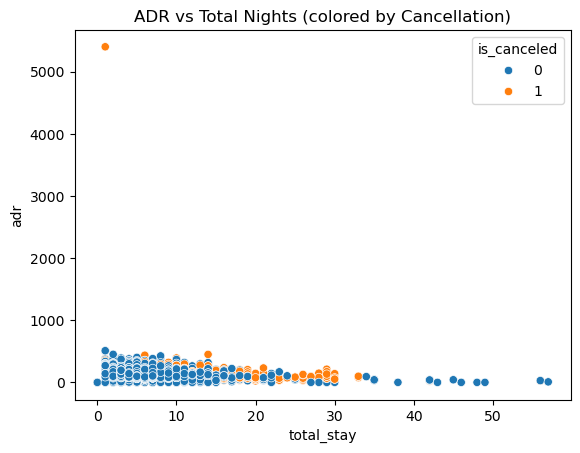

In [180]:
sns.scatterplot(x='total_stay', y='adr', hue='is_canceled', data=df2)
plt.title('ADR vs Total Nights (colored by Cancellation)')

Time Series Analysis of Booking Trends

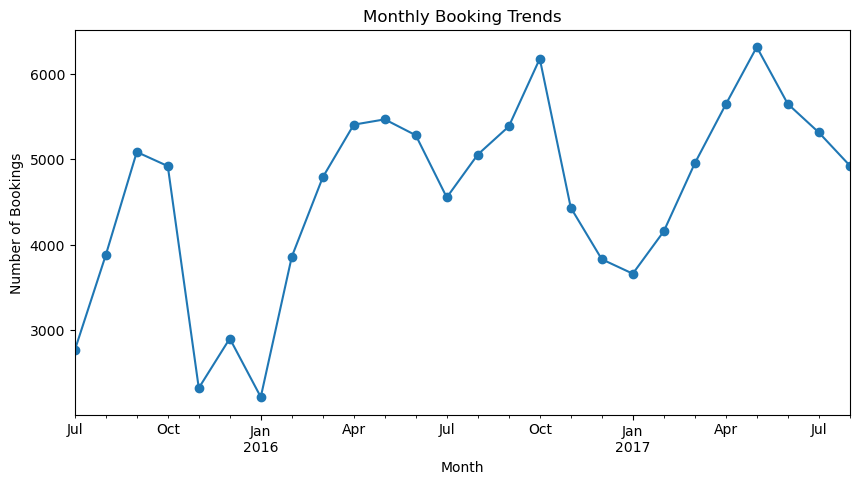

In [192]:
monthly_bookings = df2.groupby(df2['arrival_date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

Above graph gives us an idea of how bookings variate month-wise

**Guest demographics and distribution by country.**

In [196]:
top_10 = df['country'].value_counts().head(10)
top_10

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

Text(0, 0.5, 'Number of Bookings')

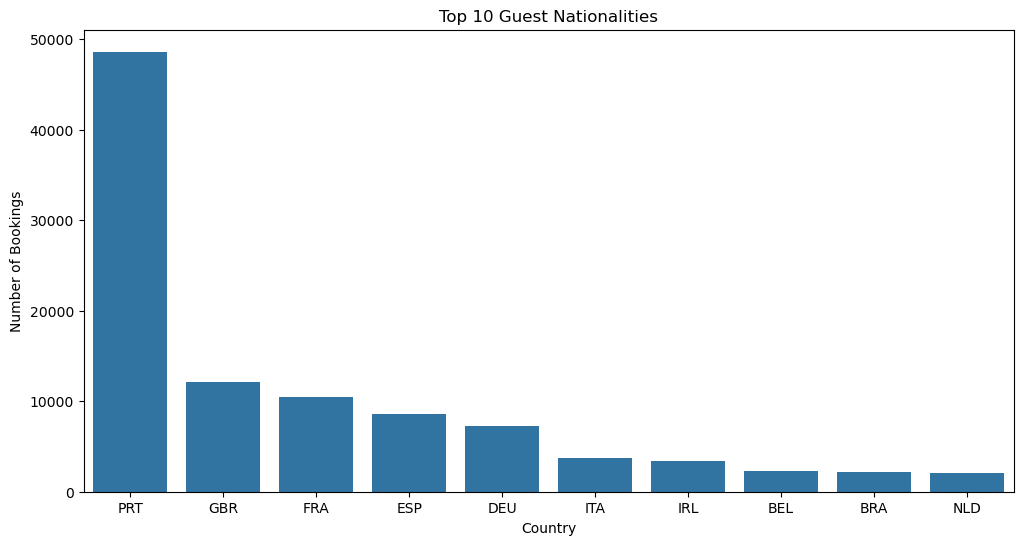

In [194]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Guest Nationalities')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

 **Market segment share and ADR (Average Daily Rate) comparison.**

In [197]:
market_segment_counts = df2['market_segment'].value_counts()
market_segment_counts

market_segment
Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: count, dtype: int64

In [199]:
adr_by_segment = df2.groupby('market_segment')['adr'].mean()
adr_by_segment

market_segment
Aviation         100.142110
Complementary      2.921757
Corporate         70.283731
Direct           115.934427
Groups            79.466592
Offline TA/TO     87.432976
Online TA        117.252769
Undefined         15.000000
Name: adr, dtype: float64

<Axes: xlabel='market_segment'>

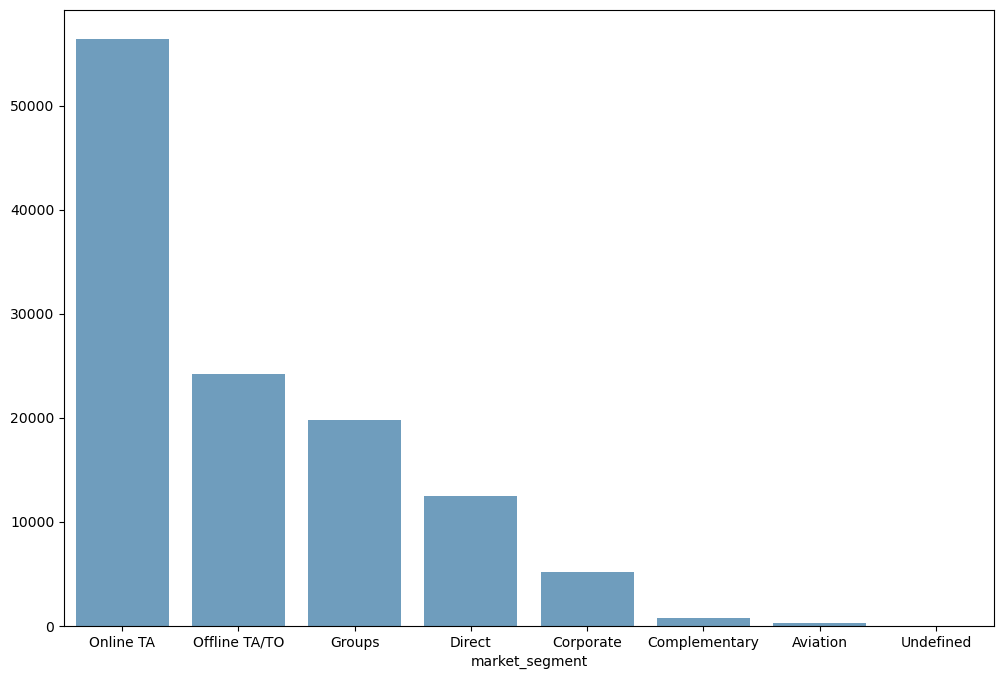

In [206]:
plt.figure(figsize=(12, 8))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, alpha=0.7)

**Booking lead time distribution across customer types**



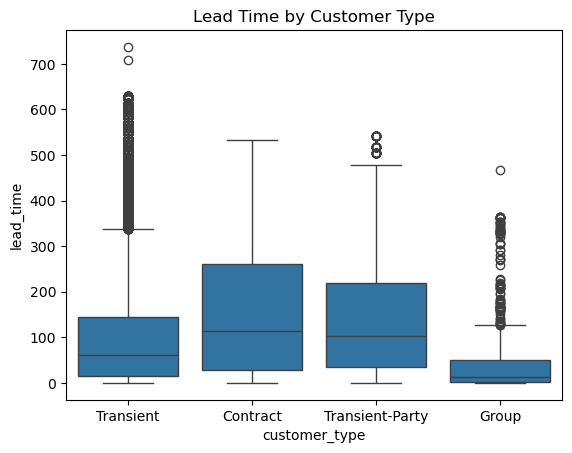

In [207]:
sns.boxplot(x='customer_type', y='lead_time', data=df2)
plt.title("Lead Time by Customer Type")
plt.show()

# 3. Correlation Analysis

In [214]:
numeric_cols = ['lead_time', 'adr', 'booking_changes', 
                'total_of_special_requests', 'days_in_waiting_list', 
               'total_stay']

<Axes: >

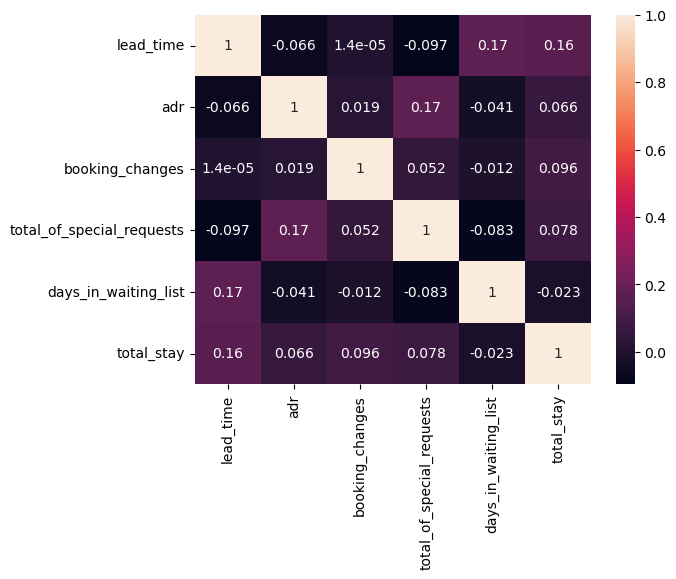

In [215]:
sns.heatmap(df2[numeric_cols].corr(), annot=True)

In [219]:
np.corrcoef(df2['adr'], df2['lead_time'])

array([[ 1.        , -0.06633153],
       [-0.06633153,  1.        ]])

In [218]:
np.corrcoef(df2['adr'], df2['total_of_special_requests'])

array([[1.        , 0.17140409],
       [0.17140409, 1.        ]])

In [221]:
np.corrcoef(df2['adr'], df2['booking_changes'])

array([[1.      , 0.019217],
       [0.019217, 1.      ]])

Correlation analysis shows that ADR is weakly influenced by the number of special requests, while lead time and booking changes have almost negligible impact on ADR. This indicates that price variation may be more influenced by other factors like market segment, room type, or hotel type, and not just booking behavior.

# 4. Hypothesis Testing

#### 1. Ho: No difference in ADR between Online TA and Direct

In [224]:
online_ta_adr = df[df['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df[df['distribution_channel'] == 'Direct']['adr']
ssw.ztest(online_ta_adr, direct_adr, value = 0)

(-7.482310991727907, 7.302688034155967e-14)

p(7.302688034155967e-14) < 0.05 -> Reject Ho -> ADR differs significantly

#### 2. Ho: Room upgrades are independent of lead time

In [230]:
df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)
ssw.ztest(df2[df2['is_upgraded'] == 1]['lead_time'], df2[df2['is_upgraded'] == 0]['lead_time'], value = 0)

C:\Users\debas\AppData\Local\Temp\ipykernel_23264\510619241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)


(-48.582751966258066, 0.0)

p(0.0) < 0.05 -> Reject Ho -> Room upgrades are dependent on lead time.

#### 3. H0: Average stay duration does not differ between customer types

In [234]:
mod1 = ols('total_stay ~ customer_type', data = df2).fit()
tb1 = sm.stats.anova_lm(mod1)
tb1

,df,sum_sq,mean_sq,F,PR(>F)
customer_type,3.0,18149.307592,6049.769197,956.606477,0.0
Residual,118898.0,751934.546742,6.324198,NaN,NaN


p(0.0) < 0.05 -> Reject Ho -> Average stay duration does

# Key Business Questions

1. What influences ADR the most?

In [235]:
correlation = df2.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))

Top correlations with ADR:
 adr                          1.000000
total_revenue                0.566511
total_guests                 0.365864
children                     0.325033
adults                       0.227431
arrival_date_year            0.197919
total_of_special_requests    0.171404
arrival_date_month           0.078780
arrival_date_week_number     0.075256
total_stay                   0.066044
Name: adr, dtype: float64


In [236]:
print(df.groupby('hotel')['adr'].mean())
print(df.groupby('customer_type')['adr'].mean())
print(df.groupby('market_segment')['adr'].mean())
print(df.groupby('reserved_room_type')['adr'].mean())

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64
customer_type
Contract            87.549637
Group               83.488579
Transient          107.013621
Transient-Party     86.084253
Name: adr, dtype: float64
market_segment
Aviation         100.142110
Complementary      2.886366
Corporate         69.358952
Direct           115.445175
Groups            79.479472
Offline TA/TO     87.354783
Online TA        117.197063
Undefined         15.000000
Name: adr, dtype: float64
reserved_room_type
A     90.796658
B     90.360447
C    160.216792
D    120.682882
E    124.540179
F    167.689651
G    175.996027
H    188.223111
L    124.666667
P      0.000000
Name: adr, dtype: float64


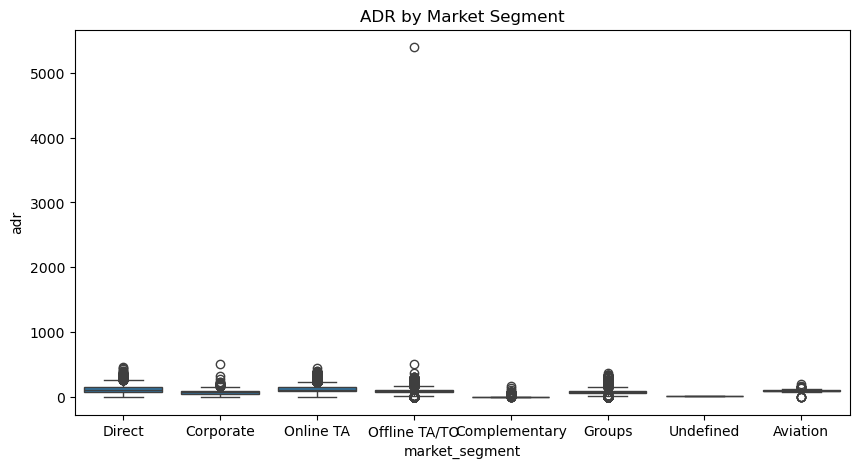

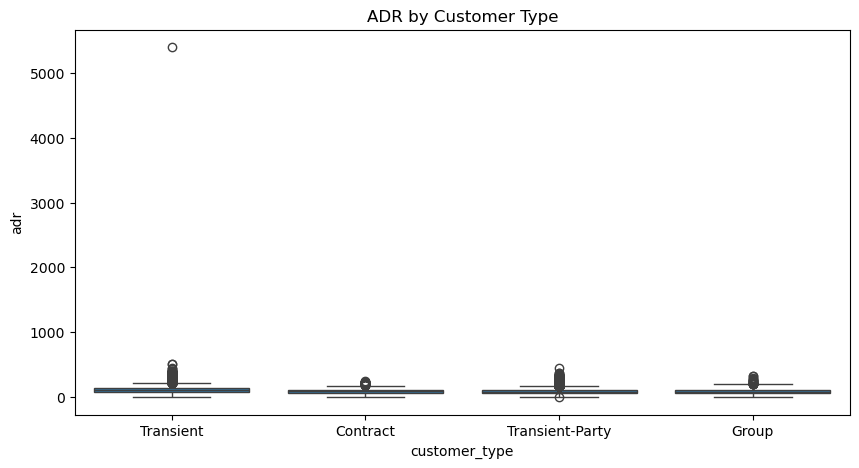

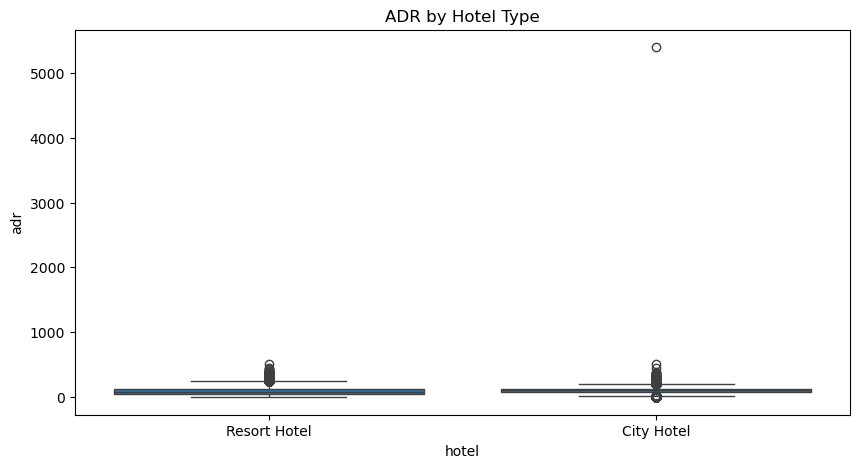

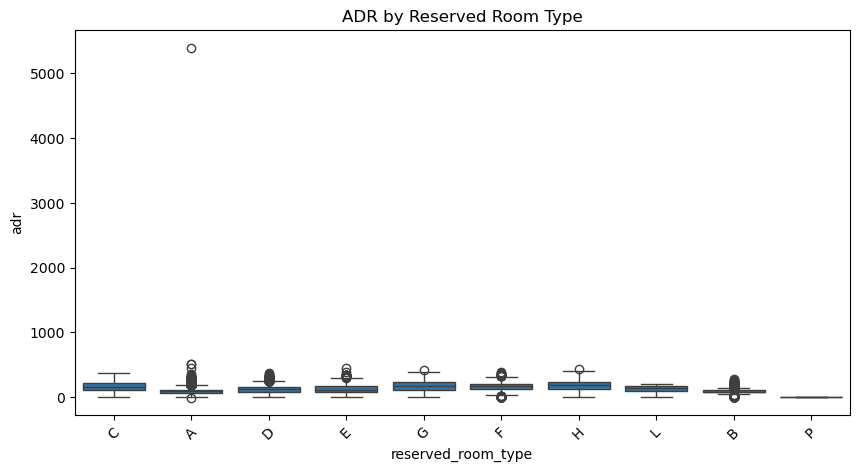

In [242]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='market_segment', y='adr', data=df2)
plt.title("ADR by Market Segment")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='customer_type', y='adr', data=df2)
plt.title("ADR by Customer Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='hotel', y='adr', data=df2)
plt.title("ADR by Hotel Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='reserved_room_type', y='adr', data=df2)
plt.title("ADR by Reserved Room Type")
plt.xticks(rotation=45)
plt.show()

In [239]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


2. Do guests who book earlier tend to request more changes?

In [ ]:
np.corrcoef(df2['lead_time'], df2['booking_changes'])

array([[1.0000000e+00, 1.4403601e-05],
       [1.4403601e-05, 1.0000000e+00]])

p-value < 0.05 → not statistically significant.

3. Are there pricing or booking differences across countries?

In [18]:
country_stats = df2.groupby('country')[['adr', 'lead_time']].mean()
top_countries = country_stats.sort_values(by='adr', ascending=False).head(15)
top_countries = top_countries.reset_index()
print(top_countries)

   country         adr   lead_time
0      DJI  273.000000    0.000000
1      AIA  265.000000    0.000000
2      AND  202.652857   47.000000
3      UMI  200.000000   11.000000
4      LAO  181.665000    2.500000
5      MYT  177.750000  208.000000
6      NCL  175.500000  116.000000
7      GEO  169.015909   97.681818
8      COM  165.305000   22.500000
9      FRO  155.200000  286.400000
10     PHL  154.355750   58.050000
11     GIB  150.402222  117.277778
12     BGD  149.802500   28.083333
13     SLV  148.850000   49.000000
14     BHR  145.330000  173.800000


Text(0.5, 1.0, 'Top 15 Countries by Average ADR')

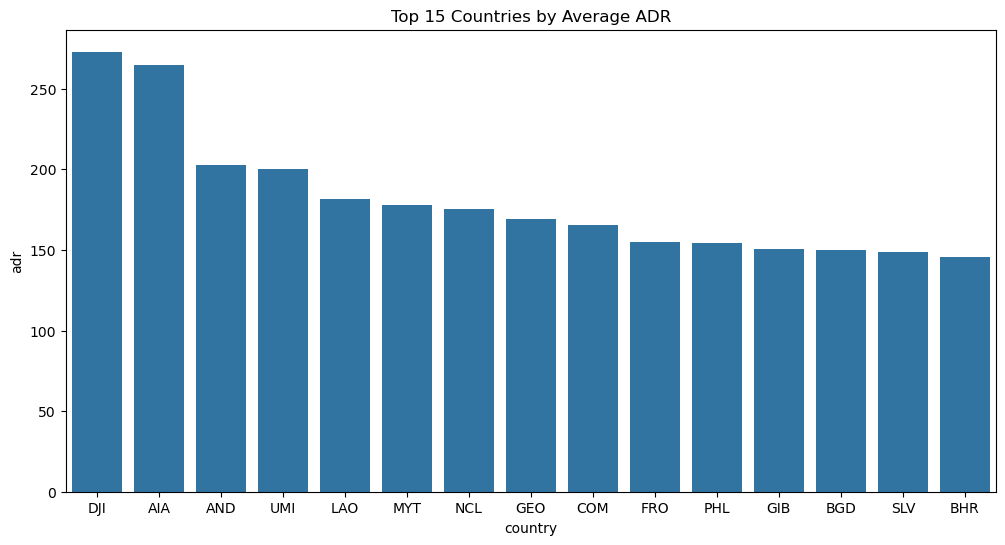

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='adr', data=top_countries)
plt.title("Top 15 Countries by Average ADR")


4. Is there a pattern in room upgrades or reassignment?

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\4024848401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)


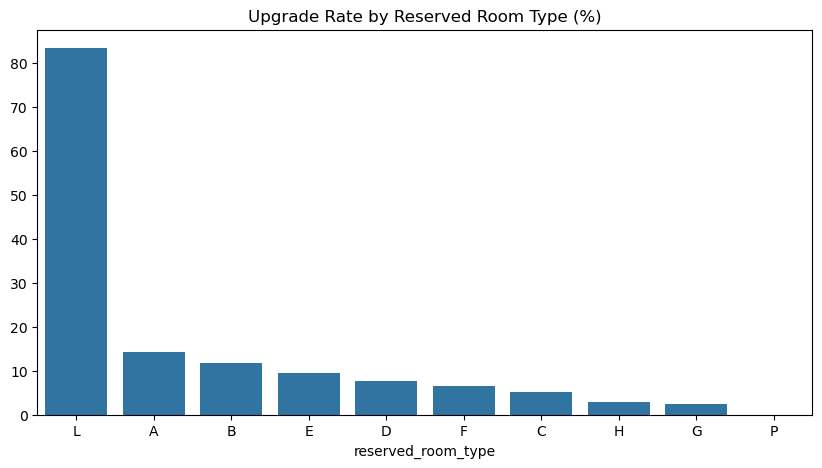

In [39]:
df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)
upgrade_by_room = df2.groupby('reserved_room_type')['is_upgraded'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=upgrade_by_room.index, y=upgrade_by_room.values)
plt.title("Upgrade Rate by Reserved Room Type (%)")
plt.show()

5. Are reserved room types consistently matched with assigned room types?

In [38]:
df2['room_matched'] = (df2['reserved_room_type'] == df2['assigned_room_type']).astype(int)
match_counts = df['room_matched'].value_counts(normalize=True).rename({1: 'Matched', 0: 'Mismatched'}) * 100
print("Room Match Status (%):\n", match_counts)

Room Match Status (%):
 room_matched
Matched       87.505654
Mismatched    12.494346
Name: proportion, dtype: float64


C:\Users\debas\AppData\Local\Temp\ipykernel_16100\2879486937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['room_matched'] = (df2['reserved_room_type'] == df2['assigned_room_type']).astype(int)


6. What are the most common guest demographics (e.g., group size, nationality)?

In [29]:
group_size_counts = df2['total_guests'].value_counts().sort_index()
top_nationalities = df2['country'].value_counts().head(10)
top_nationalities, group_size_counts.head(10)

(country
 PRT    48590
 GBR    12129
 FRA    10415
 ESP     8568
 DEU     7287
 ITA     3766
 IRL     3375
 BEL     2342
 BRA     2224
 NLD     2104
 Name: count, dtype: int64,
 total_guests
 0.0       170
 1.0     22289
 2.0     81883
 3.0     10480
 4.0      3926
 5.0       137
 6.0         1
 10.0        2
 12.0        2
 20.0        2
 Name: count, dtype: int64)

7. Do guest types influence booking behavior?

In [37]:
df2['is_canceled'] = df2['is_canceled'].astype(int)
customer_stats = df2.groupby('customer_type')[['adr', 'lead_time', 'is_canceled']].mean()
customer_counts = df2['customer_type'].value_counts()
customer_stats['booking_count'] = customer_counts
customer_stats = customer_stats.sort_values(by='adr', ascending=False).reset_index()
customer_stats

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\602520337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_canceled'] = df2['is_canceled'].astype(int)


,customer_type,adr,lead_time,is_canceled,booking_count
0,Transient,107.245498,93.631574,0.408864,89174
1,Contract,87.549637,142.969823,0.309617,4076
2,Transient-Party,86.111330,137.087274,0.254246,25082
3,Group,84.023351,55.724561,0.101754,570


8. How does lead time vary by customer type and country?

Text(0.5, 0, 'Customer Type')

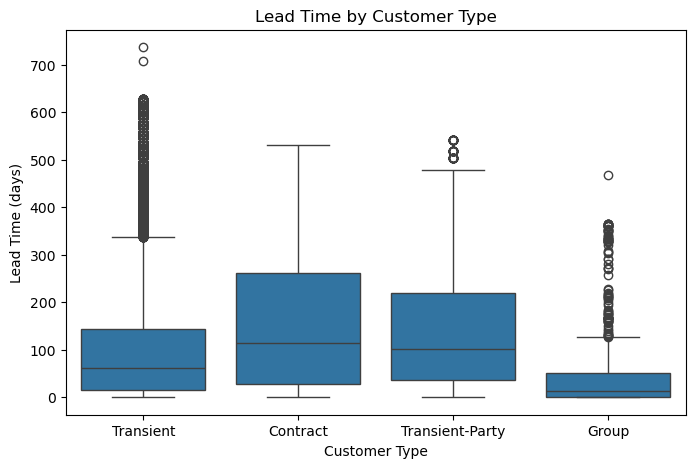

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='customer_type', y='lead_time', data=df2)
plt.title("Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.xlabel("Customer Type")

Text(0.5, 1.0, 'Lead Time by Top 5 Guest Countries')

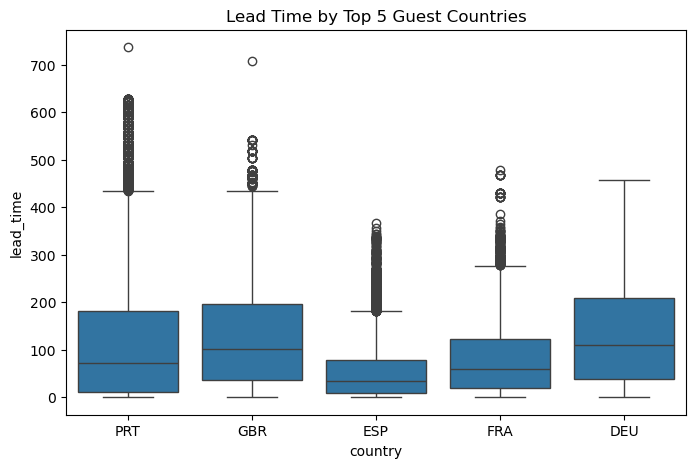

In [35]:
top_countries = df2['country'].value_counts().head(5).index
df_top_countries = df2[df2['country'].isin(top_countries)]
plt.figure(figsize=(8, 5))
sns.boxplot(x='country', y='lead_time', data=df_top_countries)
plt.title("Lead Time by Top 5 Guest Countries")

9. Are longer lead times associated with fewer changes or cancellations?

Text(0.5, 1.0, 'Lead Time vs Booking Changes')

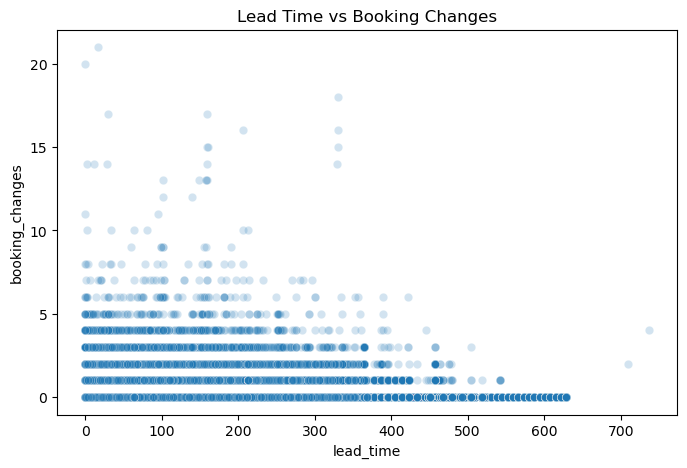

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='booking_changes', data=df2, alpha=0.2)
plt.title("Lead Time vs Booking Changes")

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\41357642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df2, palette='pastel')


Text(0, 0.5, 'Lead Time (days)')

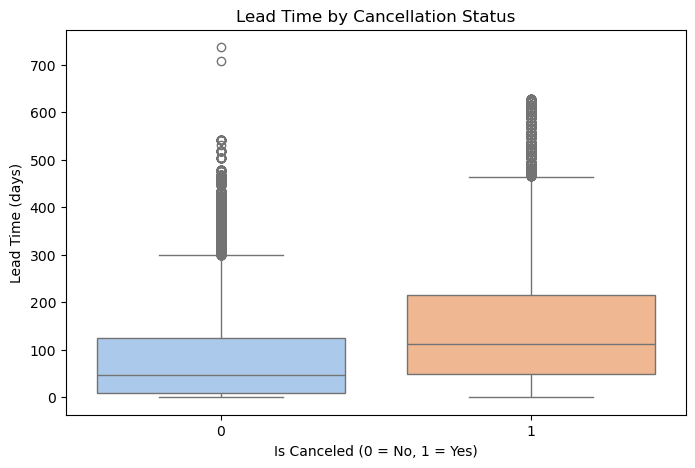

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df2, palette='pastel')
plt.title("Lead Time by Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")

10. What is the typical duration of stay, and how does it vary by customer type or segment?


In [45]:

stay_by_customer_type = df2.groupby('customer_type')['total_stay'].mean().sort_values(ascending=False)
stay_by_market_segment = df2.groupby('market_segment')['total_stay'].mean().sort_values(ascending=False)
stay_by_customer_type, stay_by_market_segment


(customer_type
 Contract           5.320658
 Transient          3.451544
 Transient-Party    3.063193
 Group              2.894737
 Name: total_stay, dtype: float64,
 market_segment
 Offline TA/TO    3.903767
 Aviation         3.607595
 Online TA        3.575359
 Direct           3.199855
 Groups           2.992628
 Corporate        2.112307
 Complementary    1.660763
 Undefined        1.500000
 Name: total_stay, dtype: float64)

11. How often are guests upgraded or reassigned to a different room type?


In [46]:

upgrade_distribution = df2['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
upgrade_distribution

is_upgraded
No Upgrade    87.637718
Upgraded      12.362282
Name: proportion, dtype: float64

12. Are guests who make special requests more likely to experience booking changes or longer stays?

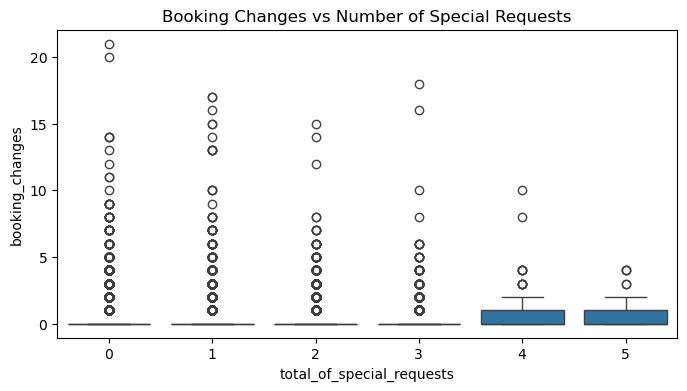

In [47]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='total_of_special_requests', y='booking_changes', data=df2)
plt.title("Booking Changes vs Number of Special Requests")
plt.show()


In [51]:
np.corrcoef(df2.total_of_special_requests, df2.booking_changes), np.corrcoef(df2.total_of_special_requests, df2.total_stay)

(array([[1.       , 0.0524228],
        [0.0524228, 1.       ]]),
 array([[1.        , 0.07790804],
        [0.07790804, 1.        ]]))

13. Do certain market segments or distribution channels show higher booking consistency or revenue?


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

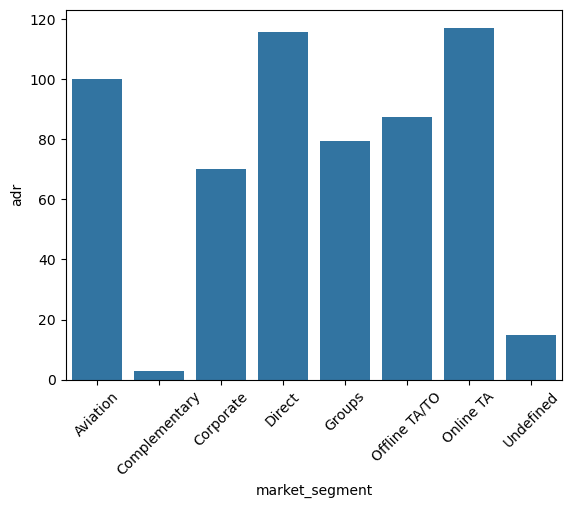

In [52]:
segment_stats = df2.groupby('market_segment')[['adr', 'is_canceled']].mean()
channel_stats = df2.groupby('distribution_channel')[['adr', 'is_canceled']].mean()
sns.barplot(x=segment_stats.index, y=segment_stats['adr']);  
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

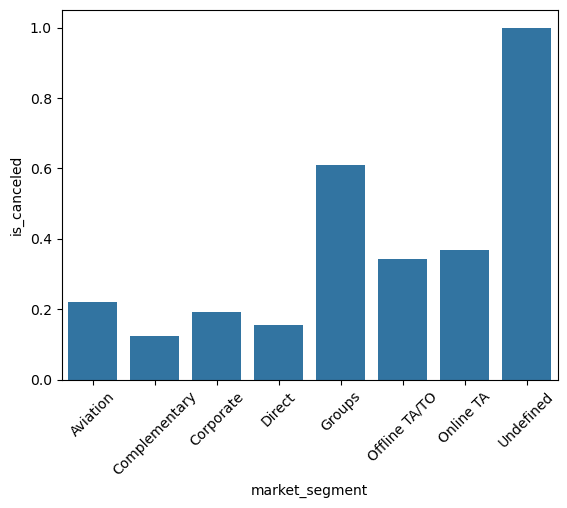

In [55]:
sns.barplot(x=segment_stats.index, y=segment_stats['is_canceled']);
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

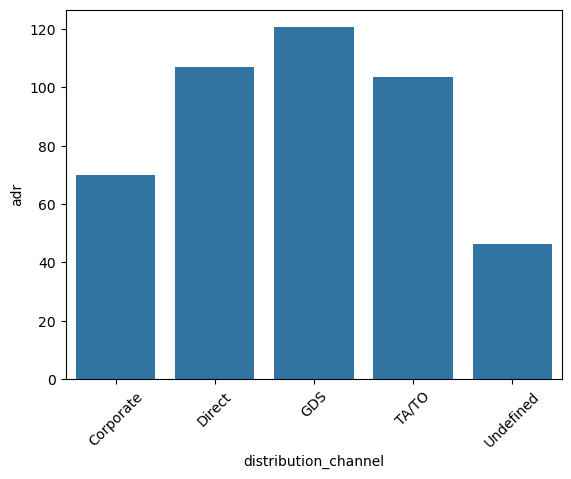

In [54]:
sns.barplot(x=channel_stats.index, y=channel_stats['adr']); 
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

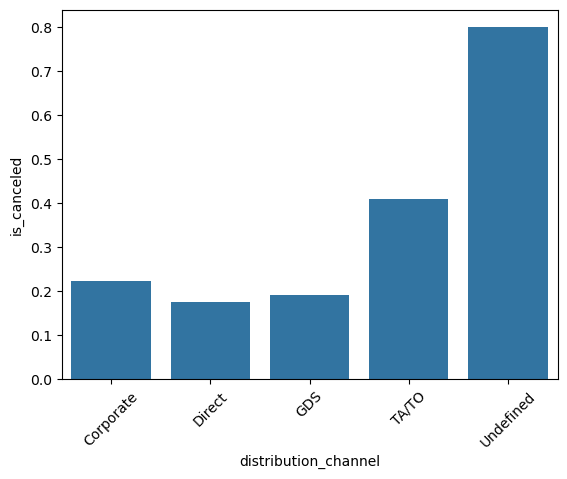

In [56]:
sns.barplot(x=channel_stats.index, y=channel_stats['is_canceled']);  
plt.xticks(rotation=45)

Online TA gives highest ADR but higher risk of cancellations.  
Direct bookings offer high ADR and low cancellation — most reliable.  
Group bookings cancel often — need caution when forecasting.    
GDS & Direct are high-value channels with acceptable cancellation rates.  
TA/TO has high revenue but high volatility.

14. What factors are most strongly associated with higher ADR?


In [57]:
correlation = df.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))

Top correlations with ADR:
 adr                            1.000000
children                       0.324854
adults                         0.230641
arrival_date_year              0.197580
total_of_special_requests      0.172185
room_matched                   0.138133
company                        0.086376
arrival_date_week_number       0.075791
stays_in_week_nights           0.065237
required_car_parking_spaces    0.056628
Name: adr, dtype: float64


As the magnitude of co-relation coefficient of total_revenue vs adr is close to 1, so we can consclude that total_revenue influences adr the most

15. Are there customer types or segments consistently contributing to higher revenue?


In [59]:
revenue_by_customer = df2.groupby('customer_type')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_customer

customer_type
Contract           451.196700
Transient          382.503005
Transient-Party    260.442157
Group              245.612439
Name: total_revenue, dtype: float64

In [61]:
revenue_by_segment = df2.groupby('market_segment')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        424.141389
Direct           404.654284
Aviation         368.971983
Offline TA/TO    336.801500
Groups           235.696594
Corporate        149.190796
Undefined         24.000000
Complementary      6.924414
Name: total_revenue, dtype: float64

Contract and Transient customers contribute the highest per-booking revenue. Transient bookings offer both volume and value.

Online TA and Direct channels bring in the highest revenue. Complimentary bookings contribute nearly zero.

16. Do bookings with more lead time or from specific countries yield higher ADR?


In [65]:
df2['lead_time_bucket'] = pd.cut(df2['lead_time'], bins=[0, 30, 90, 180, 365, df2['lead_time'].max()],
                                labels=['0–30d', '31–90d', '91–180d', '181–365d', '365+d'])
adr_by_lead_time = df2.groupby('lead_time_bucket')['adr'].mean()
adr_by_lead_time

C:\Users\debas\AppData\Local\Temp\ipykernel_16100\1227859413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lead_time_bucket'] = pd.cut(df2['lead_time'], bins=[0, 30, 90, 180, 365, df2['lead_time'].max()],
C:\Users\debas\AppData\Local\Temp\ipykernel_16100\1227859413.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_by_lead_time = df2.groupby('lead_time_bucket')['adr'].mean()


lead_time_bucket
0–30d       102.320922
31–90d      106.579838
91–180d     109.103358
181–365d     95.109302
365+d        78.811569
Name: adr, dtype: float64

In [64]:
top_countries = df2['country'].value_counts().head(5).index
adr_by_country = df2[df2['country'].isin(top_countries)].groupby('country')['adr'].mean()
adr_by_country

country
DEU    104.396756
ESP    116.995463
FRA    109.617276
GBR     96.022058
PRT     92.041483
Name: adr, dtype: float64

Bookings made 1–6 months in advance have the highest ADR. Very early bookings (1+ year) tend to be cheaper — likely discounted group/contract rates.

International guests (ESP, FRA) tend to pay more than local (PRT). Portugal may get discounts due to domestic proximity.

17. Are guests with higher ADR more likely to request special services or make booking modifications?


In [66]:
np.corrcoef(df.adr, df.total_of_special_requests), np.corrcoef(df.adr, df.booking_changes)

(array([[1.        , 0.17218526],
        [0.17218526, 1.        ]]),
 array([[1.        , 0.01961767],
        [0.01961767, 1.        ]]))

Guests who pay higher tend to make more special requests, but not more booking changes.

18. Do guests from different countries behave differently in terms of booking timing or stay length?



In [68]:
country_behavior = df2.groupby('country')[['lead_time', 'total_stay']].mean().sort_values(by='lead_time', ascending=False)
country_behavior.head(10)

,lead_time,total_stay
country,,
FJI,322.000000,3.000000
FRO,286.400000,12.000000
BEN,274.000000,2.333333
LCA,268.000000,5.000000
KNA,251.500000,2.000000
MYT,208.000000,3.500000
MKD,198.200000,3.700000
BRB,192.000000,2.000000
DOM,185.285714,4.214286


In [70]:
country_behavior = df2.groupby('country')[['lead_time', 'total_stay']].mean().sort_values(by='total_stay', ascending=False)
country_behavior.head(10) 

,lead_time,total_stay
country,,
FRO,286.400000,12.000000
SEN,55.727273,8.818182
AGO,23.096685,8.116022
TGO,62.000000,8.000000
GNB,40.888889,7.111111
PLW,169.000000,7.000000
BHS,159.000000,7.000000
SLE,84.000000,7.000000
RWA,102.000000,6.500000


Countries like PRT (Portugal) might show shorter lead times, suggesting local or last-minute bookings.

Guests from countries farther away (like USA, BRA, GBR) may have longer lead times due to international travel planning.

19. Are guests who make booking changes more likely to request additional services or cancel?


In [73]:
contingency = pd.crosstab(df['booking_changes'] > 0, df['is_canceled'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p

(4169.746849050339, 0.0)

Ho: Guests who make booking changes are not more likely to cancel

As p 0 < 0.05, we reject H0, Guests who make booking changes are more likely to request services or cancel.

In [ ]:
contingency = pd.crosstab(df['booking_changes'] > 0, df['total_of_special_requests'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p

(311.0949136567454, 4.120380110344912e-65)

Ho: Guests who make booking changes are likely to request additional services

As p 0 < 0.05, we reject H0 ⇒ Guests who make booking changes are likely to request additional services.